In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Read Data

In [2]:
scanner_df = pd.read_csv('../data/statements/year/ratio_and_model_data.csv', index_col=0)
display(scanner_df[:10])

,ticker,w0_capitalExpenditure,w0_commonStockIssued,w0_commonStockRepurchased,w0_debtRepayment,w0_freeCashFlow,w0_grossProfit,w0_investmentsInPropertyPlantAndEquipment,w0_netIncome,w0_operatingIncome,...,cashFlowToDebtRatioTTM,priceBookValueRatioTTM,priceToBookRatioTTM,priceToSalesRatioTTM,priceEarningsRatioTTM,priceToFreeCashFlowsRatioTTM,priceToOperatingCashFlowsRatioTTM,priceCashFlowRatioTTM,priceEarningsToGrowthRatioTTM,priceSalesRatioTTM
0,0EFW.L,-1.226337,-0.529804,NaN,-0.600000,0.813043,NaN,-0.437022,0.927839,NaN,...,NaN,0.763883,0.763883,1.661208,6.335174,5.037500,4.149710,4.149710,0.281282,1.661208
1,217A.F,-0.590595,0.204597,0.347559,-0.107995,-0.353653,0.319094,-0.609047,-0.649862,1.366625,...,0.102534,2.323707,2.323707,3.812575,-7.359026,-10.737291,21.009806,21.009806,0.005255,3.812575
2,3IN.L,NaN,0.045269,NaN,-0.430568,0.137376,NaN,NaN,0.027046,NaN,...,NaN,1.062475,1.062475,11.088710,11.336226,158.707167,NaN,NaN,-1.427789,11.088710
3,3RB.DE,-0.868901,0.101237,1.190121,-0.419845,0.194591,0.565332,-0.854242,-0.769882,0.452743,...,0.169856,6.016312,6.016312,5.809531,31.577880,35.944814,31.668621,31.668621,0.238813,5.809531
4,690D.DE,-1.061033,NaN,NaN,-1.227335,0.769460,0.914699,NaN,0.703927,0.756138,...,0.000000,0.206309,0.206309,0.069902,1.424769,0.843494,NaN,NaN,0.174417,0.069902
5,7DIG.L,-0.305948,0.162657,0.857143,NaN,-0.442449,0.812424,-0.092571,-0.655209,-0.777214,...,NaN,-2.103292,-2.103292,1.404980,-2.293325,-3.228153,-3.391084,-3.391084,-0.027245,1.404980
6,888.L,-0.593939,-0.987013,-0.607143,-1.028571,0.196404,0.857143,0.380952,-0.208861,0.308602,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
7,88E.L,-0.425712,-0.187225,NaN,NaN,-0.392287,-0.504478,0.699956,-0.314650,0.657848,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
8,8DQ.F,-0.717167,-0.115603,NaN,0.600000,-1.761945,1.244476,-0.783790,-1.536474,-1.632744,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,8GW.IR,0.067054,0.227757,NaN,0.742857,-0.158409,NaN,0.139764,-1.147318,-1.152858,...,NaN,0.284763,0.284763,NaN,-2.622219,-1.706504,-3.848759,-3.848759,0.196523,NaN


In [3]:
display(scanner_df['priceToFreeCashFlowsRatioTTM'])

0         5.037500
1       -10.737291
2       158.707167
3        35.944814
4         0.843494
           ...    
6911    232.042154
6912      3.705639
6913     -5.631611
6914      0.000000
6915    -90.258981
Name: priceToFreeCashFlowsRatioTTM, Length: 6916, dtype: float64

### Verify w0 & w1 with plot

ADX
w0 = 0.9241047211711284 , w1 = -0.07515254545379574


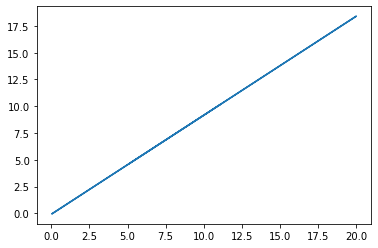

In [4]:

def line(w0, w1, num_samps=1000):
    print("w0 =", w0, ", w1 =", w1)
    xs = np.random.uniform(0, 20, num_samps) 
    ys = []
    
    for x in xs: 
        ys.append(w0*x + w1)
        
    return xs, ys

index = 140

print(scanner_df.loc[index, 'ticker'])

x, y = line(scanner_df.loc[index, 'w0_revenue'], scanner_df.loc[index, 'w1_revenue'])

plt.plot(x, y)
plt.show()

### Select stocks

In [7]:
min_slope = 1
max_book = 3
max_price_to_sales = 3
max_price_to_earnings = 18
max_earnings_to_growth = 1  
max_debt_ratio = 0.5
# PEG: p/e / growth, i.e a company with a p/e of 10 but growing
# at 30% has PEG of 0.333 & may be consdiered undervalued

selected_df = scanner_df[scanner_df['w0_revenue'] > min_slope]
selected_df = selected_df[selected_df['w0_grossProfit'] > min_slope]
#selected_df = selected_df[selected_df['w0_freeCashFlow'] > min_slope]

#selected_df = selected_df[selected_df['w0_debtRepayment'] < -1*min_slope]

selected_df = selected_df[np.logical_and(
    selected_df['priceBookValueRatioTTM'] < max_book,
    selected_df['priceBookValueRatioTTM'] > 0
)]

selected_df = selected_df[np.logical_and(
    selected_df['priceToSalesRatioTTM'] < max_price_to_sales,
    selected_df['priceToSalesRatioTTM'] > 0
)]

selected_df = selected_df[np.logical_and(
    selected_df['priceEarningsRatioTTM'] < max_price_to_earnings,
    selected_df['priceEarningsRatioTTM'] > 0
)]

selected_df = selected_df[np.logical_and(
    selected_df['priceEarningsToGrowthRatioTTM'] < max_earnings_to_growth,
    selected_df['priceEarningsToGrowthRatioTTM'] > 0.1
)]


selected_df = selected_df[
    selected_df['debtRatioTTM'] < max_debt_ratio
]




In [8]:
display(selected_df[[
    'ticker', 
    'priceBookValueRatioTTM', 
    'priceToSalesRatioTTM', 
    'priceEarningsRatioTTM', 
    'priceEarningsToGrowthRatioTTM'
]])

,ticker,priceBookValueRatioTTM,priceToSalesRatioTTM,priceEarningsRatioTTM,priceEarningsToGrowthRatioTTM
3618,KNX,1.262395,1.570519,15.799278,0.484665


In [ ]:
# cashFlowToDebtRatioTTM, debtEquityRatioTTM, debtRatioTTM, interestCoverageTTM, longTermDebtToCapitalizationTTM